# Geospatial demand estimation

**Original code:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Support:** [Ariane Millot](https://github.com/ariane-millot), [Martin J. Stringer]()<br />
**Funding:** Imperial College <br />

---------------------------


#### Brief overview

This notebook performs three main analytical processes:

- **Part 1**: Generated grid mesh (H3 hexagons) for the area of interest (given input admin boundary)
- **Part 2**: Extract GIS-based attributes (vecror or raster) to the grid
- **Part 3**: Build blocks estimating demand for the different energy vectors

A slightly more detailed description of the processing bits is presented before each part below. <br />


In [1]:
# Decide if you want to run a region or the country
area = "COUNTRY"
# area = "Copperbelt" # Regions = Central, Copperbelt, Eastern

### Import necessary modules

In [34]:
### Activate geospatial_env first

# Numeric
import numpy as np
import pandas as pd
import math

# System
import os
import shutil
from IPython.display import display, Markdown, HTML, FileLink, FileLinks

# Spatial
import geopandas as gpd
import json
import pyproj
from shapely.geometry import Point, Polygon, MultiPoint
from shapely.geometry import shape, mapping
from shapely.ops import unary_union
from shapely.geometry.polygon import Polygon
from shapely.wkt import dumps, loads
from shapely.ops import nearest_points
from pyproj import CRS
from osgeo import ogr, gdal, osr
import fiona
from rasterstats import zonal_stats
import rasterio
import rasterio.fill
from geojson import Feature, Point, FeatureCollection
import h3 as h3

# Mapping / Plotting
from functools import reduce
#import datapane as dp 
#!datapane login --token="9bde41bfbc4ad14119e32086f9f06d2e5db1d5b8"
import folium
from folium.features import GeoJsonTooltip
from folium.plugins import BeautifyIcon
from folium.plugins import HeatMap
import branca.colormap as cm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [3]:
# import ipywidgets as widgets
import tkinter as tk
from tkinter import filedialog, messagebox
import datetime
import warnings
import scipy.spatial
warnings.filterwarnings('ignore')

root = tk.Tk()
root.withdraw()
root.attributes("-topmost", True)

pd.options.display.float_format = '{:,.2f}'.format

In [4]:
from utils import processing_raster, finalizing_rasters, spatialjoinvectors

### Define directories and dataset names

In [5]:
### Define directories and dataset names
ROOT_DIR = os.path.abspath(os.curdir)
in_path = ROOT_DIR
out_path = ROOT_DIR + "/Outputs"

In [6]:
## Coordinate and projection systems
crs_WGS84 = CRS("EPSG:4326")    # Originan WGS84 coordinate system
crs_proj = CRS("EPSG:32736")    # Projection system for the selected country -- see http://epsg.io/ for more info

# Part 1. Create base grid with H3

COUNTRY
EPSG:4326


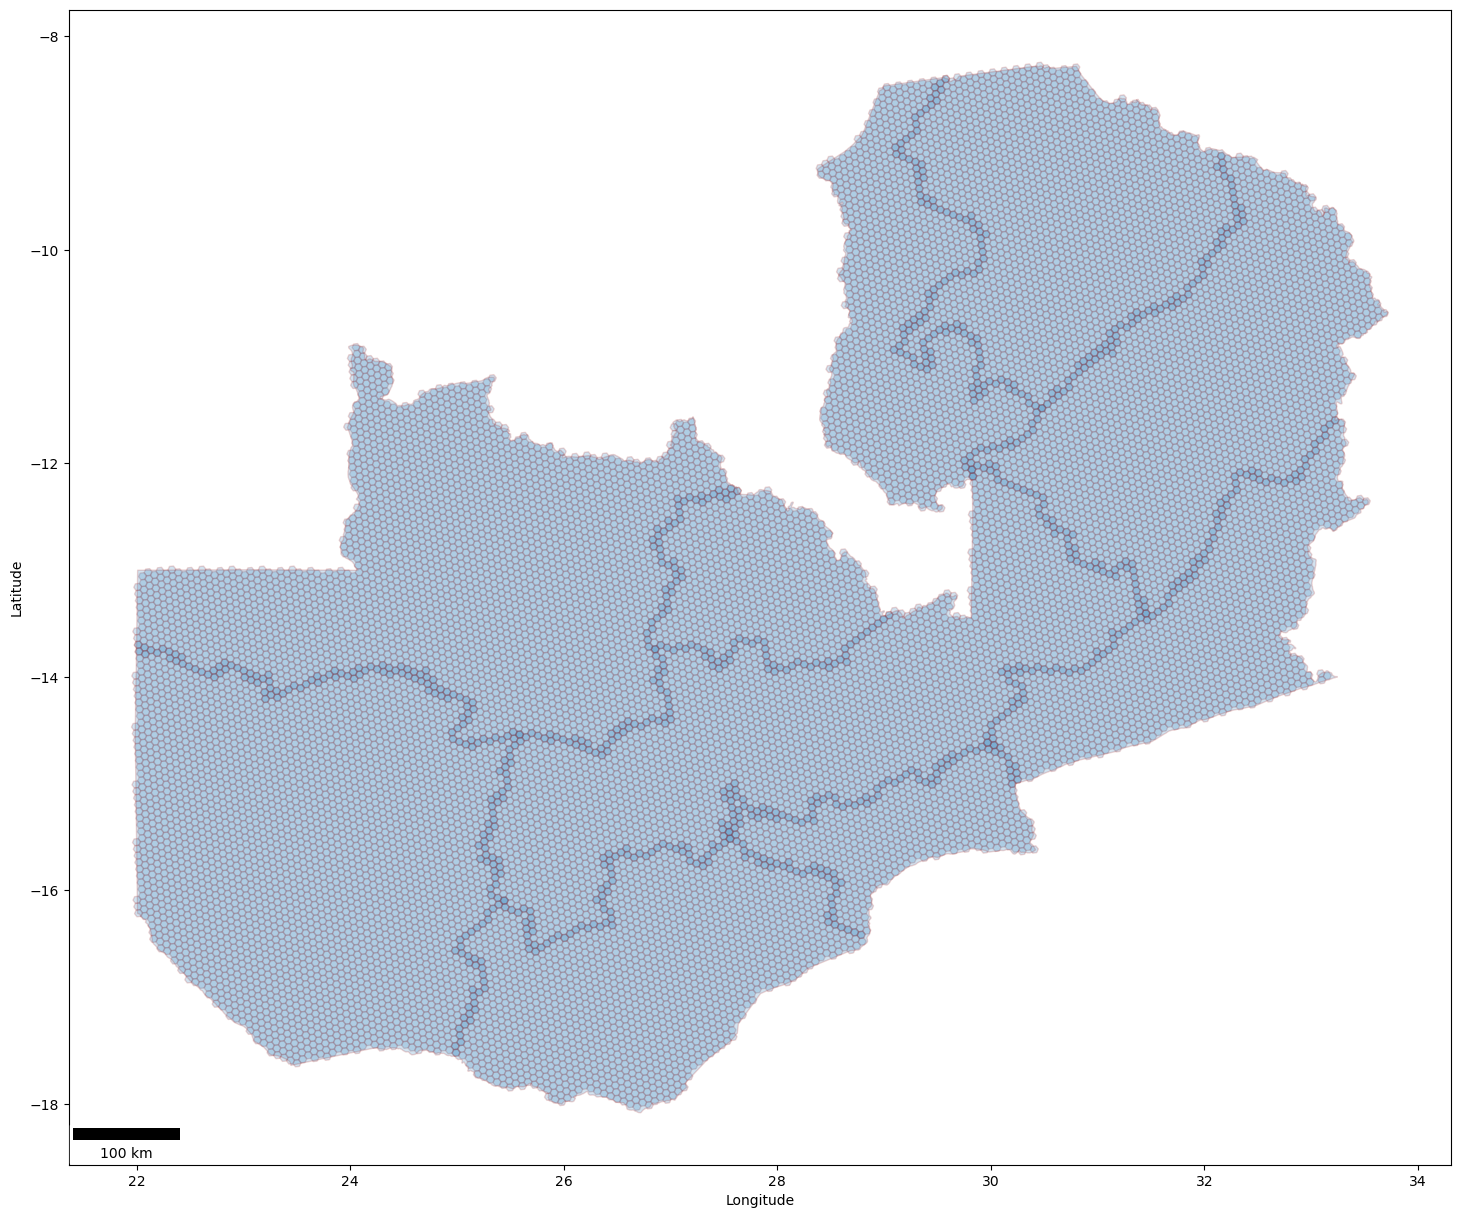

In [7]:
%run BaseGridHex.ipynb

# Part 2. Extract GIS-based attributes

## Extract raster values to hexagons

##### Once done with rasters run this cell

In [8]:
# grid = finalizing_rasters(out_path, grid, crs_proj)

Final dataframe

In [9]:
# grid.drop(['index_right'], axis=1, inplace=True)
# grid.head(4)

## Extract information from vector layers

# Part 3. Constructing Multi-vector Demand

### Calculate Total Demand

**Demand = Residential + Commercial + Industrial **

where, 

**Residential** = No of HH with access X average en. cons. kWh/HH/year X wealth adjustment factor

**Commercial**  = (No of buildings X 20 kWh/bld/year) if more than 100 buildings else (No of buildings X 100 kWh/bld/year)

**Industrial**  = Commodity Production (tonnes) from mines X average energy consumption per tonne

2024-08-10 13:26:04.770662
2024-08-10 13:27:14.006881
2024-08-10 13:42:48.833802
2024-08-10 13:43:42.155341
2024-08-10 13:44:38.485369
2024-08-10 13:45:35.513140
2024-08-10 13:45:37.587528
-1.1399999856948853
1.3027333577473958
Residential electricity consumption 4022.5 GWh


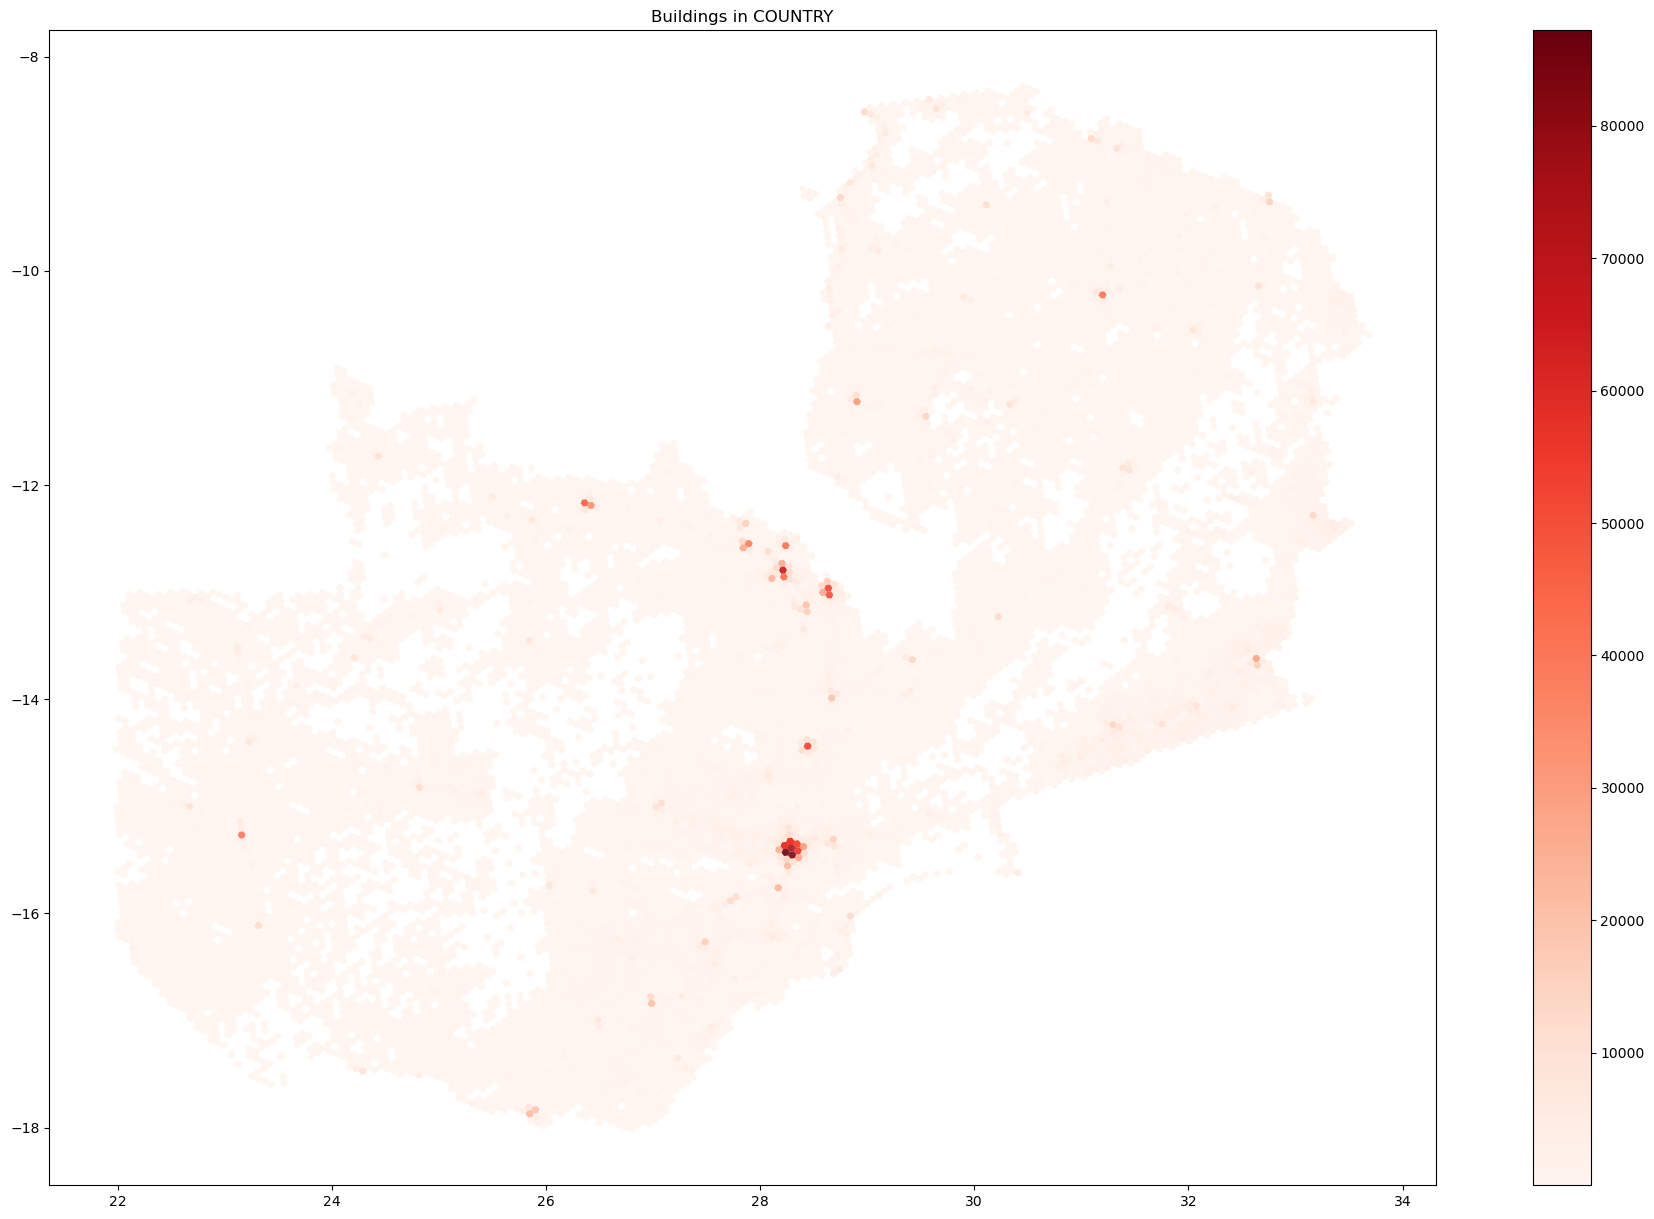

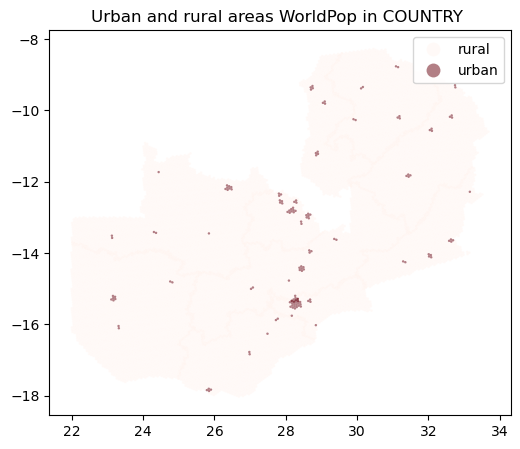

Total population: 17,798,700
   Tier 1  Tier 2  Tier 3  Tier 4  Tier 5
0       8     200     778    2224    4656


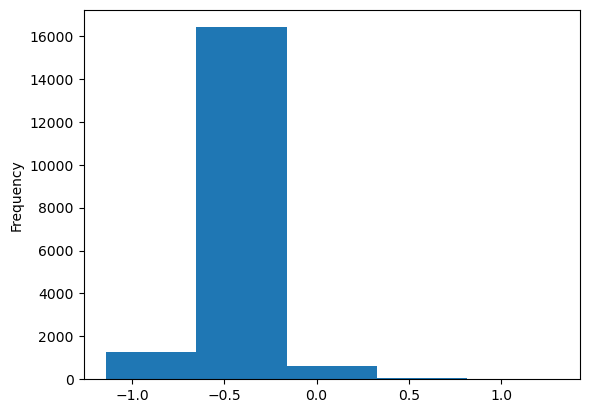

[(np.float64(-1.1399999856948853), 8), (np.float64(-0.651453317006429), 200), (np.float64(-0.16290664831797275), 778), (np.float64(0.32564002037048345), 2224), (np.float64(0.8141866890589398), 4656)]


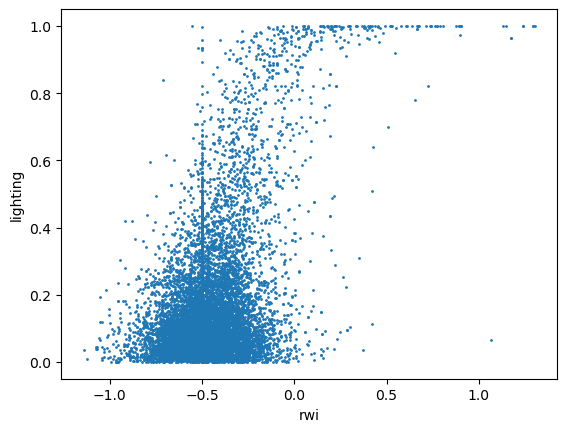

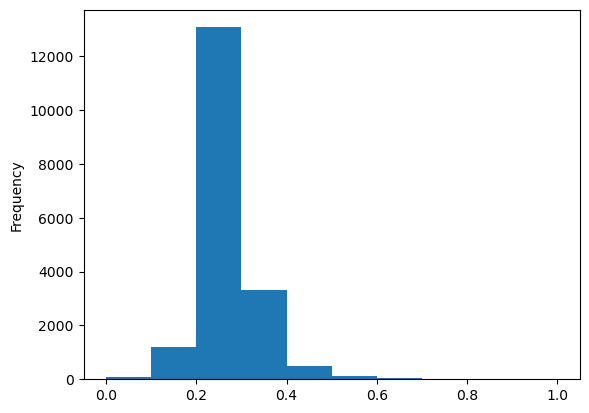

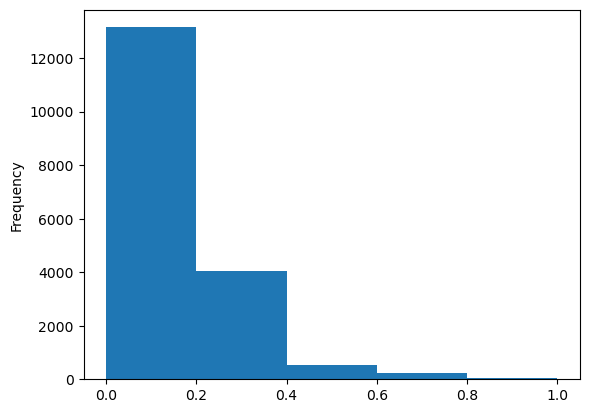

ResEnergyPerHH_index
8       13153
200      4037
778       525
4656      455
2224      220
Name: count, dtype: int64


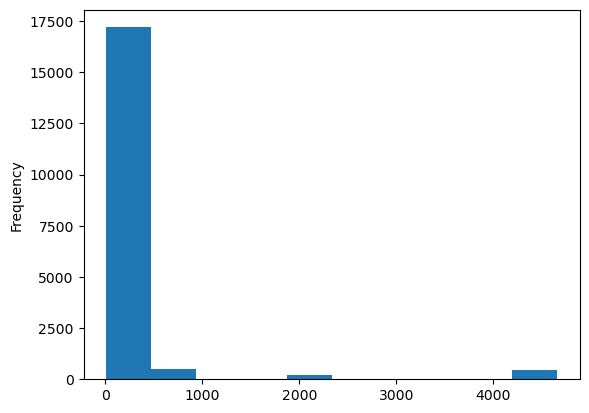

ResEnergyPerHH_index
8      0.00
200    0.03
778    0.06
2224   0.19
4656   0.24
0      0.48
Name: HHwithAccess, dtype: float64
ResEnergyPerHH_index
8      0.00
200    0.00
778    0.04
2224   0.38
4656   0.56
0      0.02
Name: HHwithAccess_urb, dtype: float64
ResEnergyPerHH_index
8      0.00
200    0.05
778    0.07
2224   0.05
4656   0.00
0      0.83
Name: HHwithAccess_rur, dtype: float64


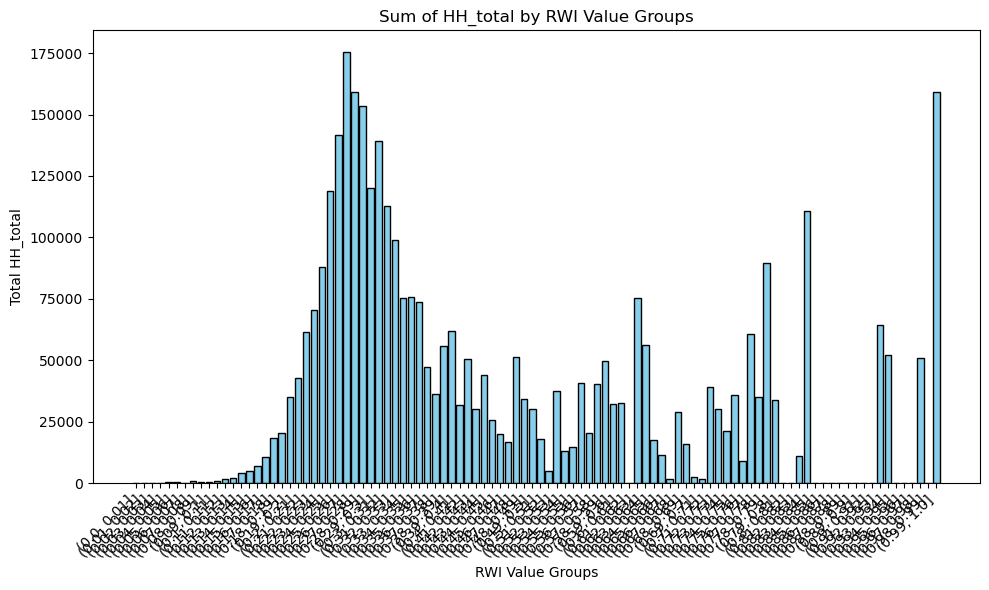

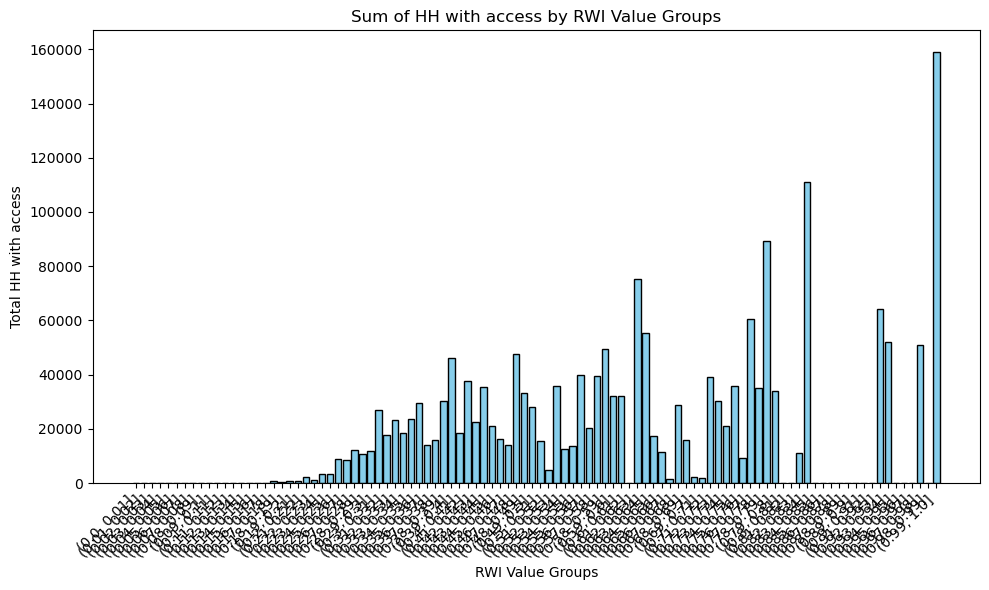

[12.08413884]


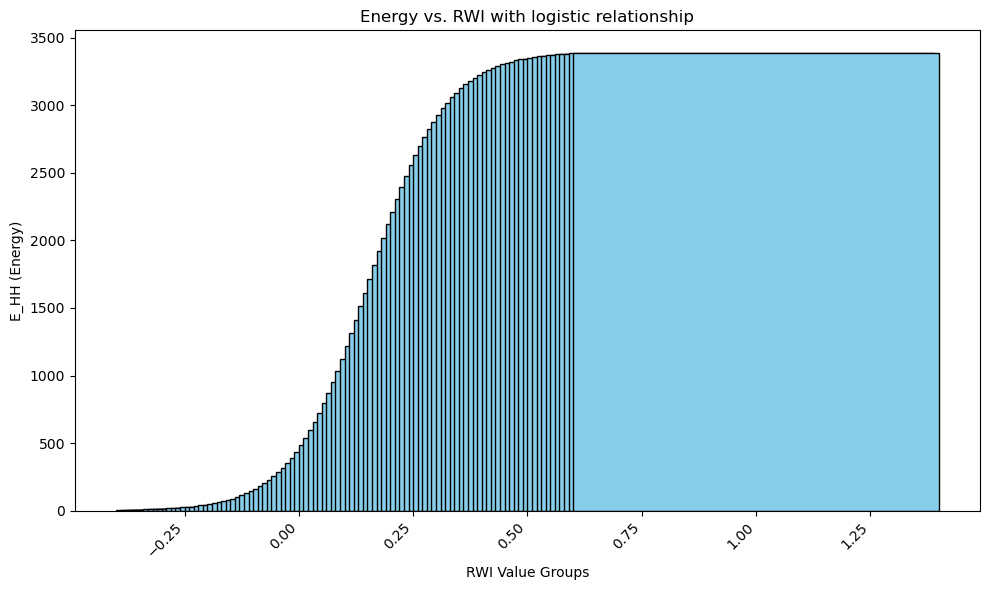

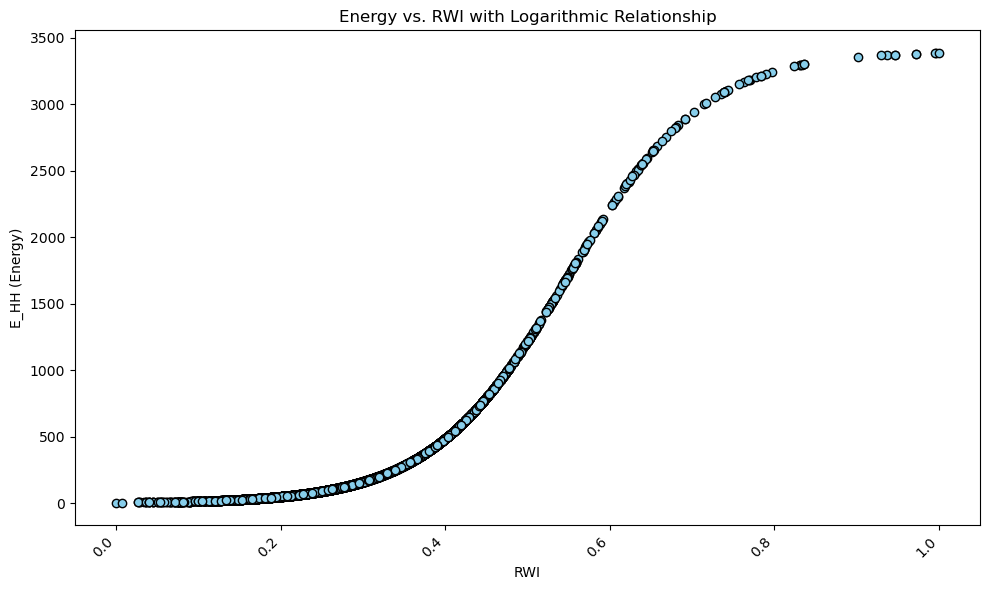

bin_labels
1   0.00
2   0.00
3   0.07
4   0.13
5   0.18
0   0.61
Name: HHwithAccess, dtype: float64
bin_labels
1   0.00
2   0.00
3   0.04
4   0.30
5   0.62
0   0.04
Name: HHwithAccess_urb, dtype: float64
bin_labels
1   0.00
2   0.00
3   0.09
4   0.06
5   0.02
0   0.83
Name: HHwithAccess_rur, dtype: float64
0.4694398262470673
residential electricity consumption UN STATS: 4,022 GWh
Index(['h3_index', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'index', 'index_righ',
       'NAME_1', 'id', 'buildingssum', 'locationWP', 'HREA', 'rwi', 'tiers',
       'GDP_PPP', 'geometry', 'Status_electrified', 'locWorldPop', 'location',
       'res_urbanBui', 'res_ruralBui', 'res_Bui', 'HH_urban', 'HH_rural',
       'HH_total', 'population', 'population_urban', 'population_rural',
       'HHwithAccess_urb', 'HHwithAccess_rur', 'HHwithAccess',
       'HHwoAccess_urb', 'HHwoAccess_rur', 'HHwoAccess', 'ResEnergyPerHH_rwi',
       'rwi_norm', 'ResEnergyPerHH_index', 'rwi_group', 'ResEnergyPerHH_log',
       'bin_labe

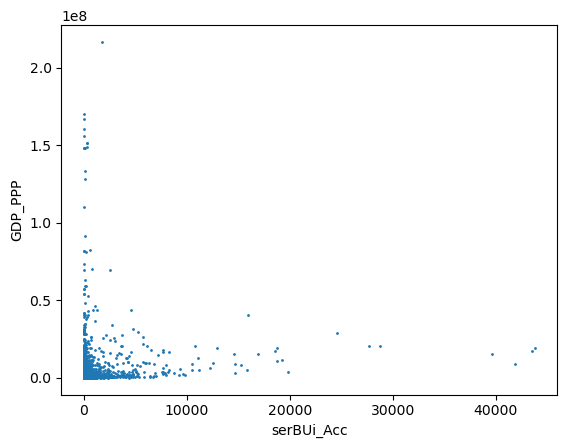

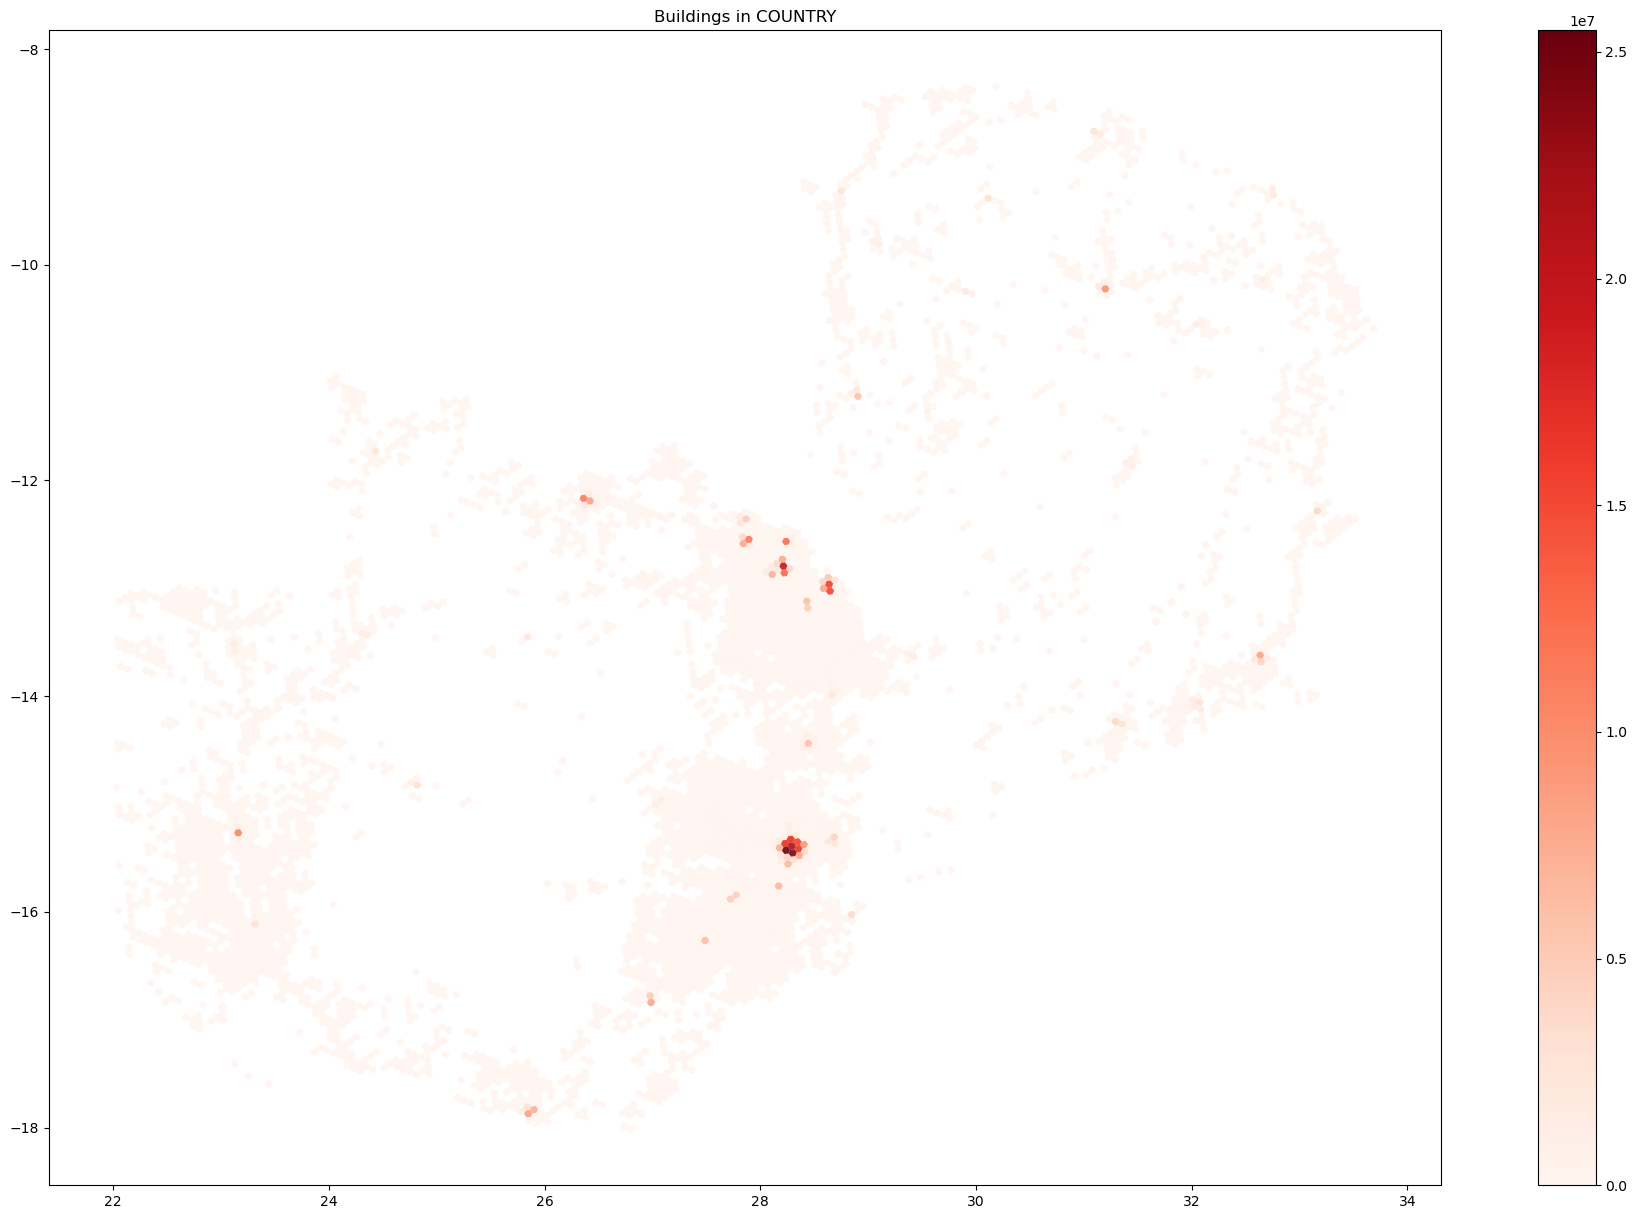

Services electricity consumption assessed after scaling:
Copperbelt 184.6 GWh
Muchinga 12.7 GWh
North-Western 42.8 GWh
Western 26.5 GWh
Luapula 28.5 GWh
Northern 29.1 GWh
Central 60.2 GWh
Southern 68.6 GWh
Eastern 47.1 GWh
Lusaka 221.7 GWh
NAME_1
Central          60.17
Copperbelt      184.60
Eastern          47.13
Luapula          28.47
Lusaka          221.65
Muchinga         12.67
North-Western    42.76
Northern         29.05
Southern         68.63
Western          26.53
Name: SEn_kWh_final, dtype: float64
721.6666666666665
Services electricity consumption assessed after scaling:
Copperbelt 1,426.7 GWh
Muchinga 26.5 GWh
North-Western 194.8 GWh
Western 91.6 GWh
Luapula 59.9 GWh
Northern 115.6 GWh
Central 301.9 GWh
Southern 309.3 GWh
Eastern 132.7 GWh
Lusaka 2,085.1 GWh
NAME_1
Central           301.94
Copperbelt      1,426.70
Eastern           132.74
Luapula            59.92
Lusaka          2,085.06
Muchinga           26.48
North-Western     194.84
Northern          115.61
Southern     

In [10]:
%run Residential/BuildingDemandMethod1_Simplified.ipynb


In [11]:
total_residentialenergy_assessed = grid['ResEnergy_kWh_meth3'].sum()
print("residential electricity consumption:", f"{total_residentialenergy_assessed/10**6:,.0f}","GWh") # GWh

residential electricity consumption: 3,697 GWh


In [12]:
# grid["Commercial"] = grid.apply(lambda row: (row['buildingscount']*50 if ((row['buildingscount'] > 100))
                                             # else row['buildingscount']*100), axis=1)
# total_servicesenergy_assessed = grid["Commercial"].sum()
# print("services electricity consumption:", f"{total_servicesenergy_assessed/10**6:,.0f}","GWh") # GWh

In [13]:
%run Industry/IndustryDemand.ipynb
print("Industry electricity consumption in",f"{area}",f"{total_industryenergy/3600:,.1f}", "TWh")

Production at a site  Fitwaola Open Pit Mine  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  Fitwaola Open Pit Mine  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  Mkushi Heap Leach  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  Mufulira West Heap-Leach Facility  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  TD3a, TD3b, TD5, and TD7 Tailings Dams  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
total statistical electricity consumption of nonFerrousMetals: 22,897.0 TJ
total statistical electricity consumption in mining: 818.0 TJ
total statistical electricity consumption of nonFerrousMetals and mining: 23,715.0 TJ
total statistical oil consumption o

In [14]:
#Concatenate results
out_path = ROOT_DIR + "/Outputs"
# gridRes = gpd.read_file(out_path + "\\" + "res_energy_map.shp")
# gridRes = gpd.read_file(out_path + "\ser_energy_map.shp") # contains services and residential data
gridBui = gpd.read_file(out_path + "\ser_energy_map.geojson") # contains services and residential data
# gridRes = gridRes.to_crs(crs_proj)
# gridInd = gpd.read_file(out_path + "\ind_energy_map.shp")
gridInd = gpd.read_file(out_path + "\ind_energy_map.geojson")
# gridInd = gridInd.to_crs(crs_proj)
# init
grid = gridBui.copy()
grid = grid.merge(gridInd, on='id', suffixes=('', '_y'))
# grid = gpd.GeoDataFrame(grid,crs=crs_proj, geometry=grid.geometry)
grid.drop(grid.filter(regex='_y$').columns, axis=1, inplace=True)
# grid = gpd.pd.concat([gridRes, gridInd])
grid.head(4)

h3_index     n0     n1     n2    n3     n4    n5  index  index_righ  \
0  8696148afffffff   2803  12112  14180  7459  13483  8748 0.1384           2   
1  8696334afffffff  14140  11194   8571  3115   3919  1550 0.1814           5   
2  86961124fffffff  16639  16405   7222   664   8529  9281 0.1345           3   
3  86961462fffffff   3843   4261   6699  1872  16124  7533 0.1484           5   

     NAME_1  ...   nb_men  nb_women_working  nb_men_working  total_employee  \
0   Eastern  ... 572.6067           75.5697        154.7756        230.3453   
1  Muchinga  ...  17.6200            1.5961          3.6473          5.2435   
2   Luapula  ... 188.9474           33.8336         34.7096         68.5432   
3  Muchinga  ...      NaN               NaN             NaN             NaN   

   SEn_kWh_Emp  SEn_kWh_weighted  SEn_kWh_final  \
0  62,540.5230            0.0000         0.0000   
1   1,423.6379               NaN            NaN   
2  18,610.0167            0.0000         0.0000   
3          NaN               NaN            NaN   

                                            geometry Energy Elec [TJ]  \
0  POLYGON ((32.22444 -12.71369, 32.18722 -12.719...              NaN   
1  POLYGON ((31.86748 -12.99196, 31.83018 -12.997...              NaN   
2  POLYGON ((29.69921 -11.07903, 29.66207 -11.084...              NaN   
3  POLYGON ((31.99556 -11.97434, 31.95843 -11.979...              NaN   

  IndEne_TJ  
0       NaN  
1       NaN  
2       NaN  
3       NaN  

[4 rows x 67 columns]

In [15]:
# grid.columns

In [16]:
#Unit
grid["IndEnergy_GWh"]=grid["IndEne_TJ"]/3600 *10**3
total_ind = grid["IndEnergy_GWh"].sum()
print(f"{total_ind:,.0f}", "GWh")
grid['REnS_GWh'] = grid['ResEnergy_kWh_meth3']/10**6
total_res = grid["REnS_GWh"].sum()
print(f"{total_res:,.0f}", "GWh")
grid['SEn_GWh'] = grid['SEn_kWh_final']/10**6
total_ser = grid["SEn_GWh"].sum()
print(f"{total_ser:,.0f}", "GWh")

5,229 GWh
3,697 GWh
722 GWh


In [17]:
grid["TotalDem"] = grid.apply(lambda row: (np.nansum([row['REnS_GWh'], 
                                          row['SEn_GWh'],  
                                             row["IndEnergy_GWh"]
                                                     ])), axis=1) #sum in GWh

In [18]:
total = grid["TotalDem"].sum()
print("total electricity consumption:", f"{total:,.0f}","GWh") # GWh

total electricity consumption: 9,647 GWh


In [19]:
grid.head(3)

h3_index     n0     n1     n2    n3     n4    n5  index  index_righ  \
0  8696148afffffff   2803  12112  14180  7459  13483  8748 0.1384           2   
1  8696334afffffff  14140  11194   8571  3115   3919  1550 0.1814           5   
2  86961124fffffff  16639  16405   7222   664   8529  9281 0.1345           3   

     NAME_1  ...  SEn_kWh_Emp  SEn_kWh_weighted  SEn_kWh_final  \
0   Eastern  ...  62,540.5230            0.0000         0.0000   
1  Muchinga  ...   1,423.6379               NaN            NaN   
2   Luapula  ...  18,610.0167            0.0000         0.0000   

                                            geometry  Energy Elec [TJ]  \
0  POLYGON ((32.22444 -12.71369, 32.18722 -12.719...               NaN   
1  POLYGON ((31.86748 -12.99196, 31.83018 -12.997...               NaN   
2  POLYGON ((29.69921 -11.07903, 29.66207 -11.084...               NaN   

   IndEne_TJ  IndEnergy_GWh REnS_GWh SEn_GWh TotalDem  
0        NaN            NaN      NaN  0.0000   0.0000  
1        NaN            NaN      NaN     NaN   0.0000  
2        NaN            NaN      NaN  0.0000   0.0000  

[3 rows x 71 columns]

### Export result

In [20]:
crs_WGS84 = CRS("EPSG:4326")    # Originan WGS84 coordinate system
grid = grid.to_crs({ 'init': crs_WGS84}) 

In [21]:
with fiona.Env(OSR_WKT_FORMAT="WKT2_2018"):
    grid.to_file(out_path + "\\" + 'total_demand_grid.gpkg', driver="GPKG", index=False, engine='fiona')
#grid.to_file(out_path + "\\" + 'total_demand_grid.geojson', driver="GeoJSON")
grid.to_file(out_path + "\\" + f'total_demand.geojson', driver='GeoJSON', index=False)  

## Print maps for quick assessment

### Total demand map

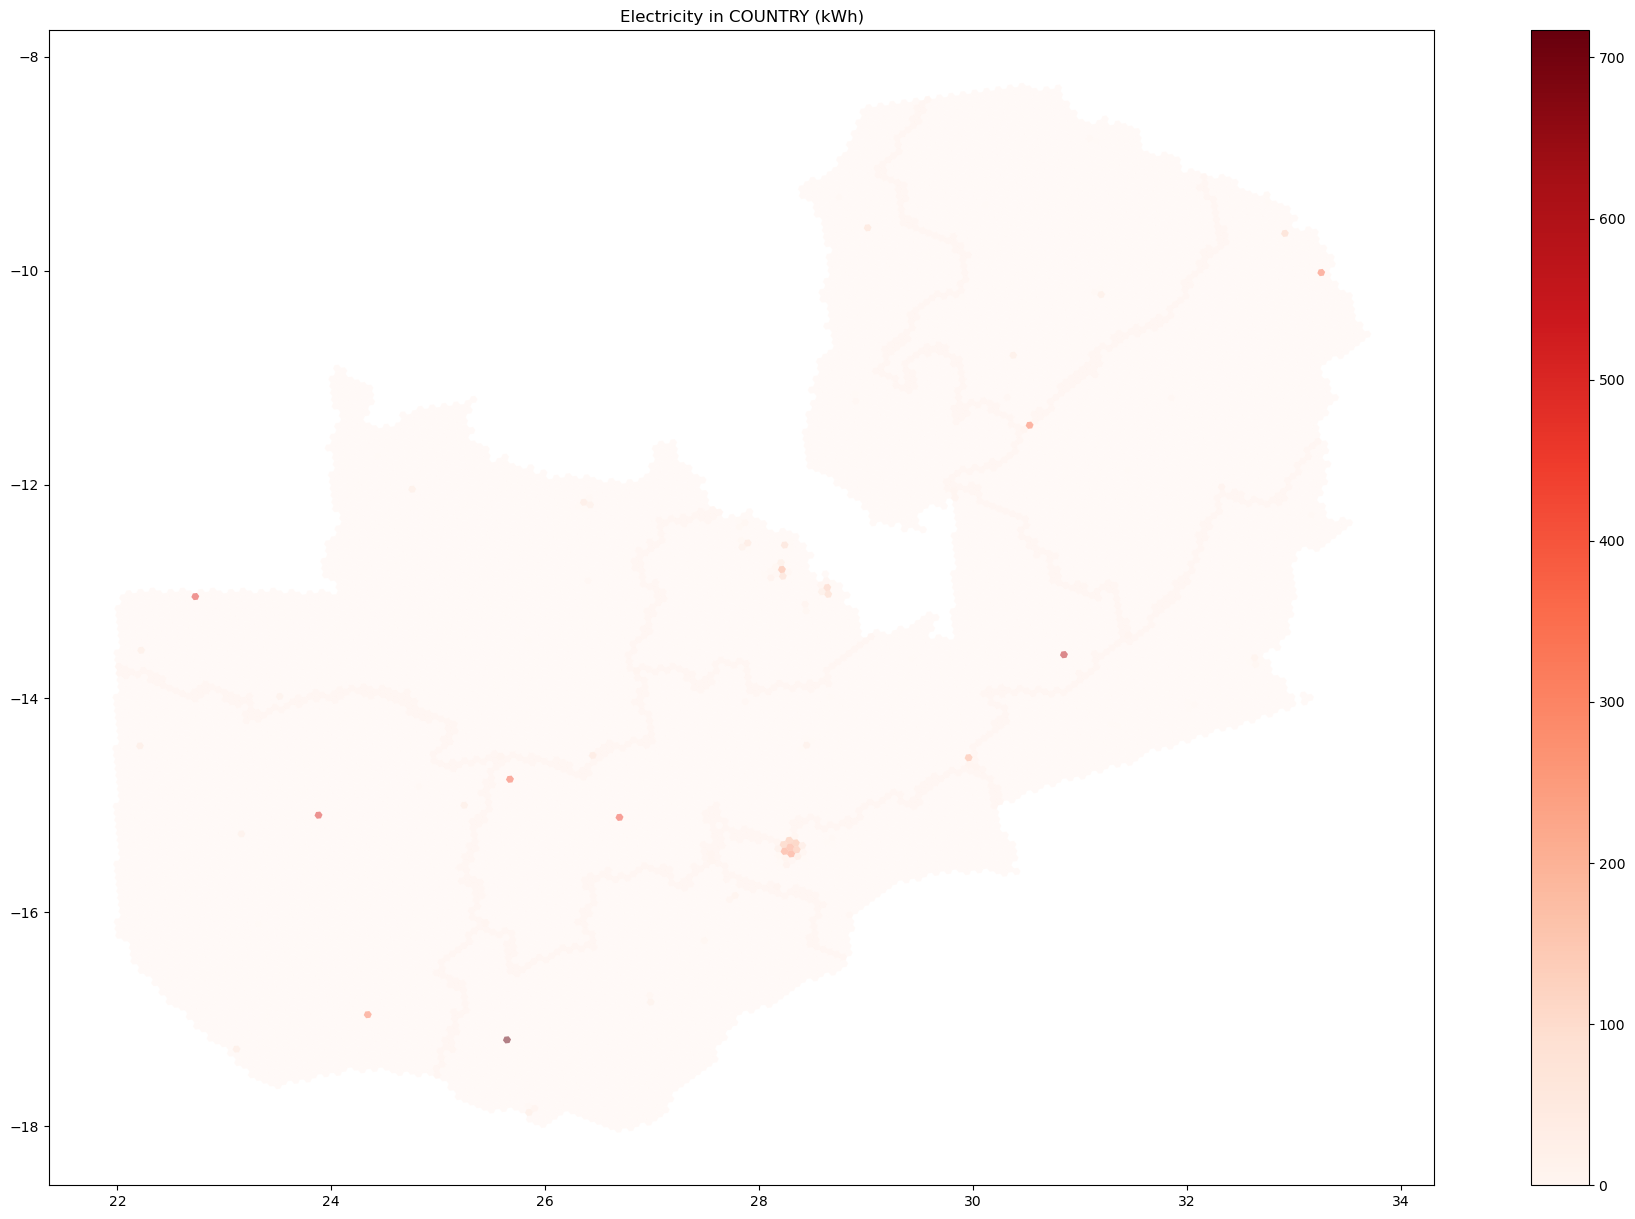

In [22]:
# Plot the demand map with use of the full scale
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Plot data
grid.sort_values('TotalDem', ascending=True).plot(
    ax=ax, column='TotalDem', cmap="Reds", legend=True, alpha=0.5)

ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity in {} (kWh)'.format(area) )

# Save plot as figure 
plt.savefig('sample_priority_map.png', bbox_inches='tight')

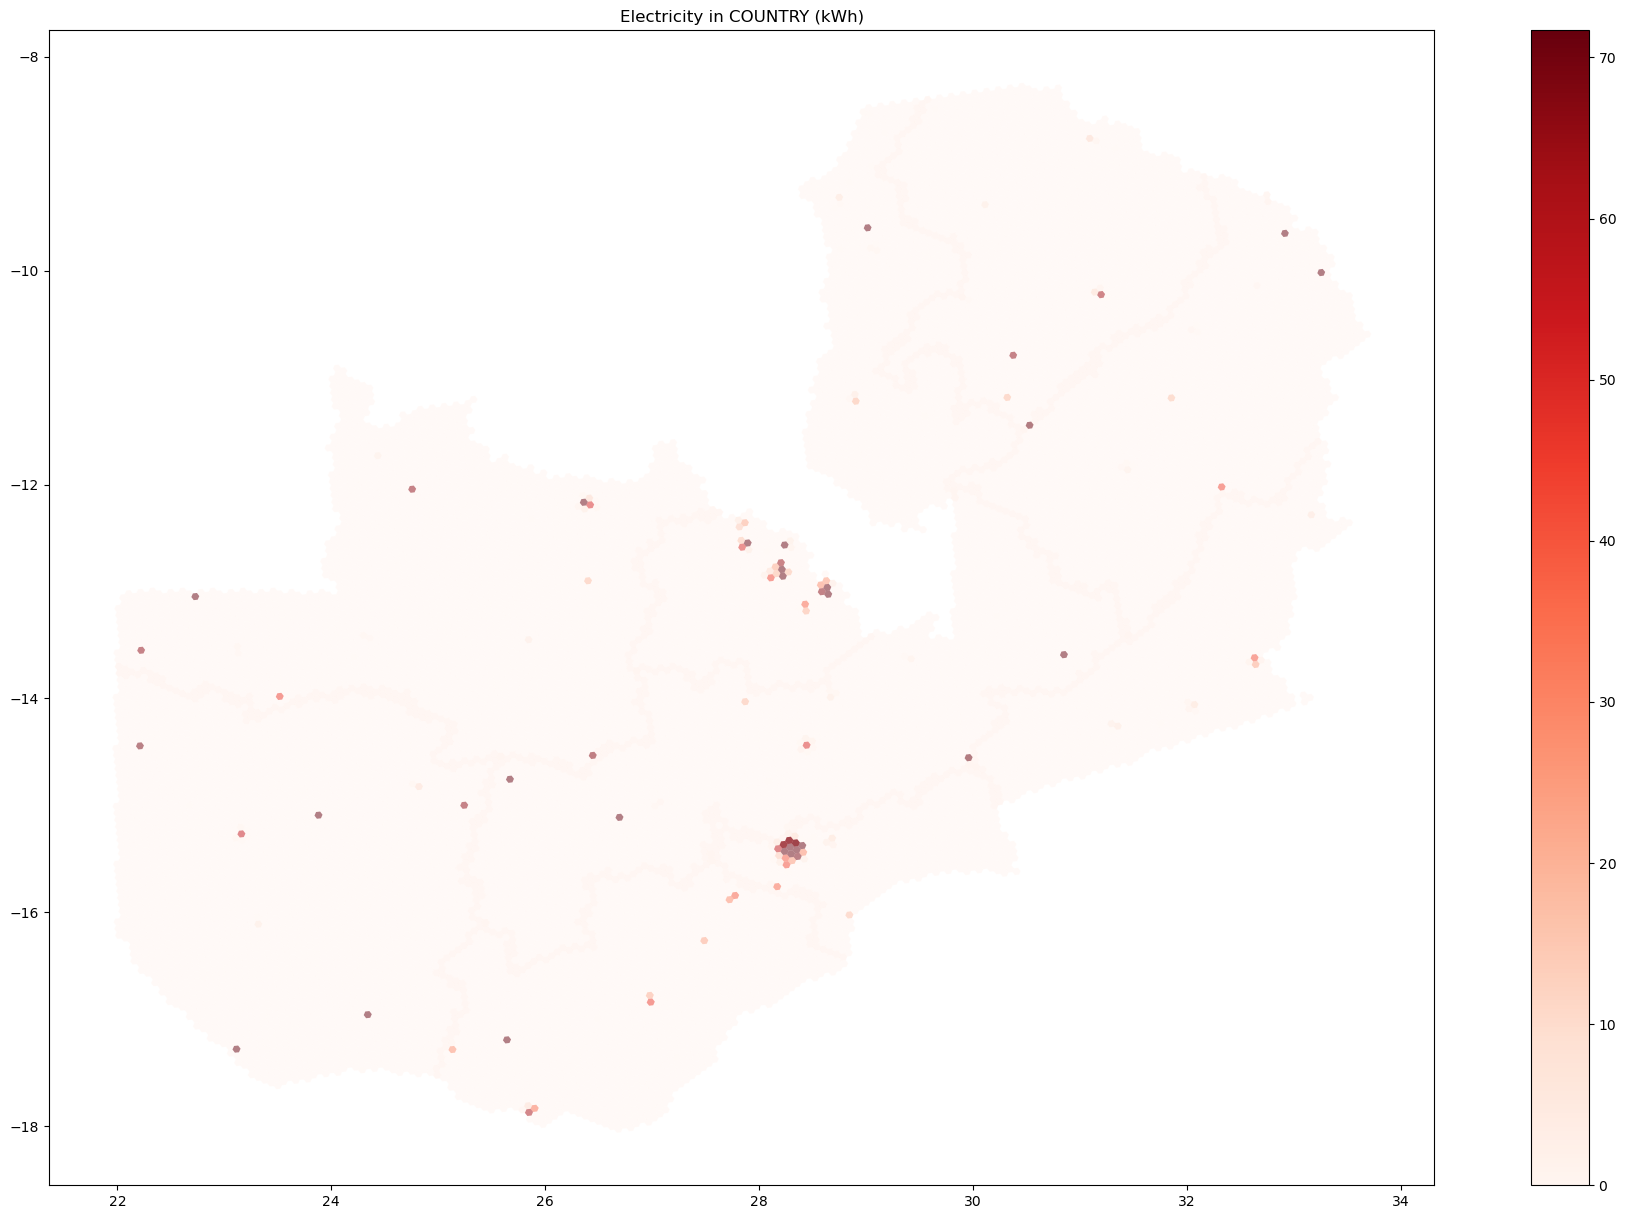

In [23]:
# Plot the demand map with a threshold value
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Set the threshold
# threshold = np.percentile(npgrid['TotalDem'], 90)
threshold = 0.1 * grid['TotalDem'].max()

# Plot data
grid.sort_values('TotalDem', ascending=True).plot(
    ax=ax, column='TotalDem', cmap="Reds", legend=True, alpha=0.5, vmin=0, vmax=threshold)

ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity in {} (kWh)'.format(area) )

# Save plot as figure 
plt.savefig('sample_priority_map_threshold.png', bbox_inches='tight')

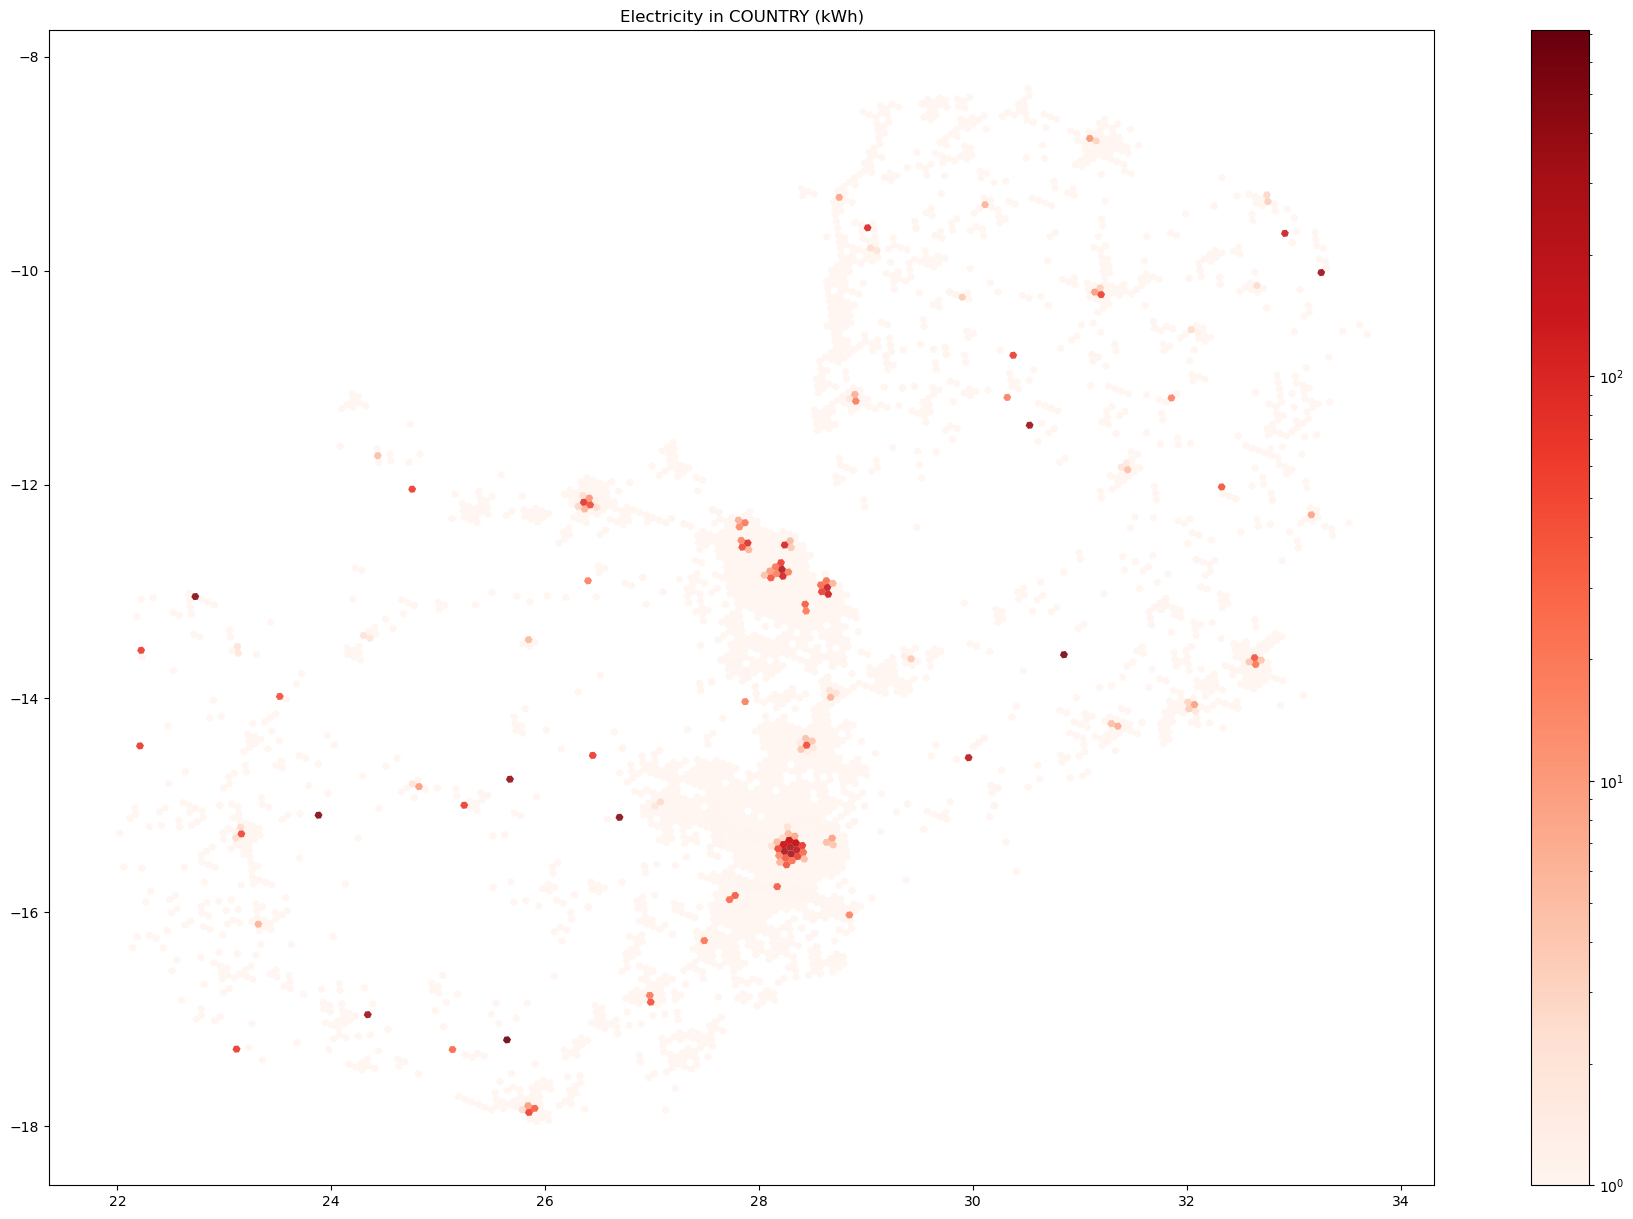

In [24]:
# Plot the demand map with a log scale value
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Plot data
grid.sort_values('TotalDem', ascending=True).plot(
    ax=ax, column='TotalDem', cmap="Reds", legend=True, alpha=0.9, norm=colors.LogNorm(vmin = 1, vmax=grid['TotalDem'].max()))

ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity in {} (kWh)'.format(area) )

# Save plot as figure 
plt.savefig('sample_priority_map_log.png', bbox_inches='tight')

### Residential map

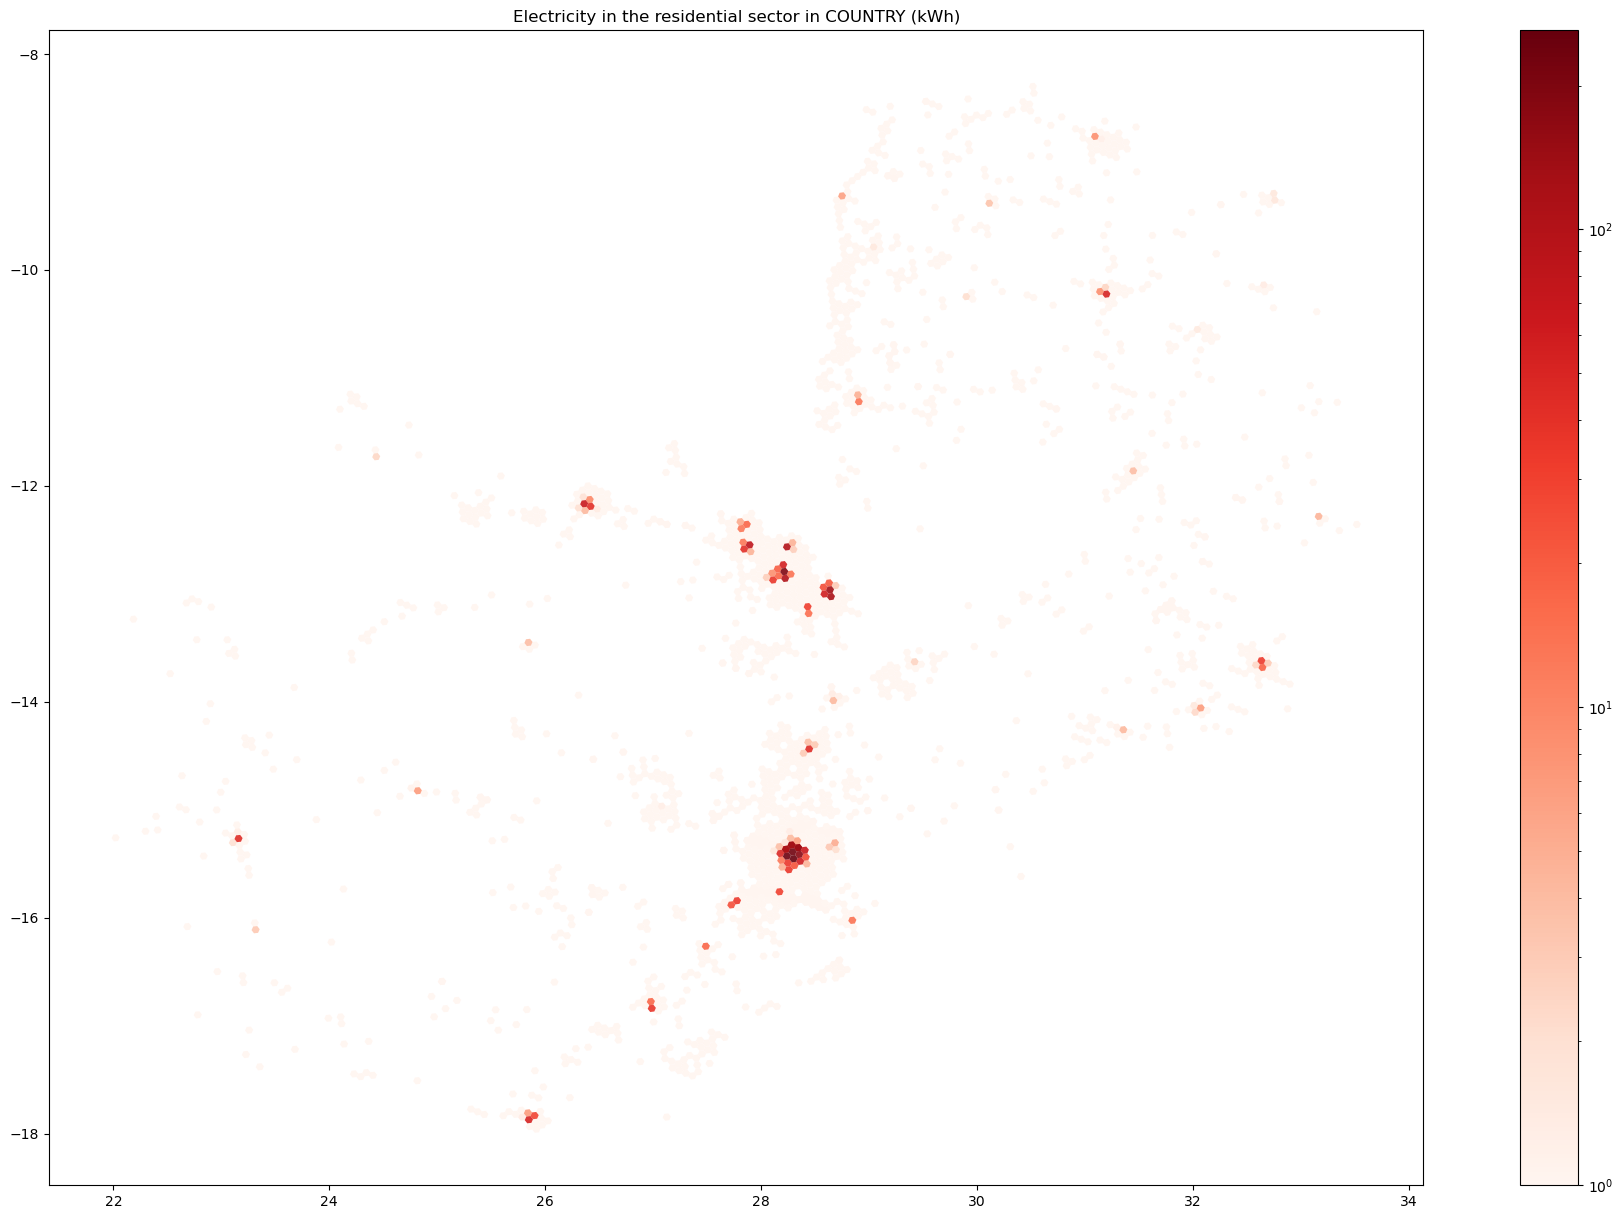

In [25]:
# Plot the demand map with a log scale value
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Plot data
grid.sort_values('REnS_GWh', ascending=True).plot(
    ax=ax, column='REnS_GWh', cmap="Reds", legend=True, alpha=0.9, norm=colors.LogNorm(vmin = 1, vmax=grid['REnS_GWh'].max()))

ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity in the residential sector in {} (kWh)'.format(area) )

# Save plot as figure 
plt.savefig('sample_priority_map_log_res.png', bbox_inches='tight')

### Services map

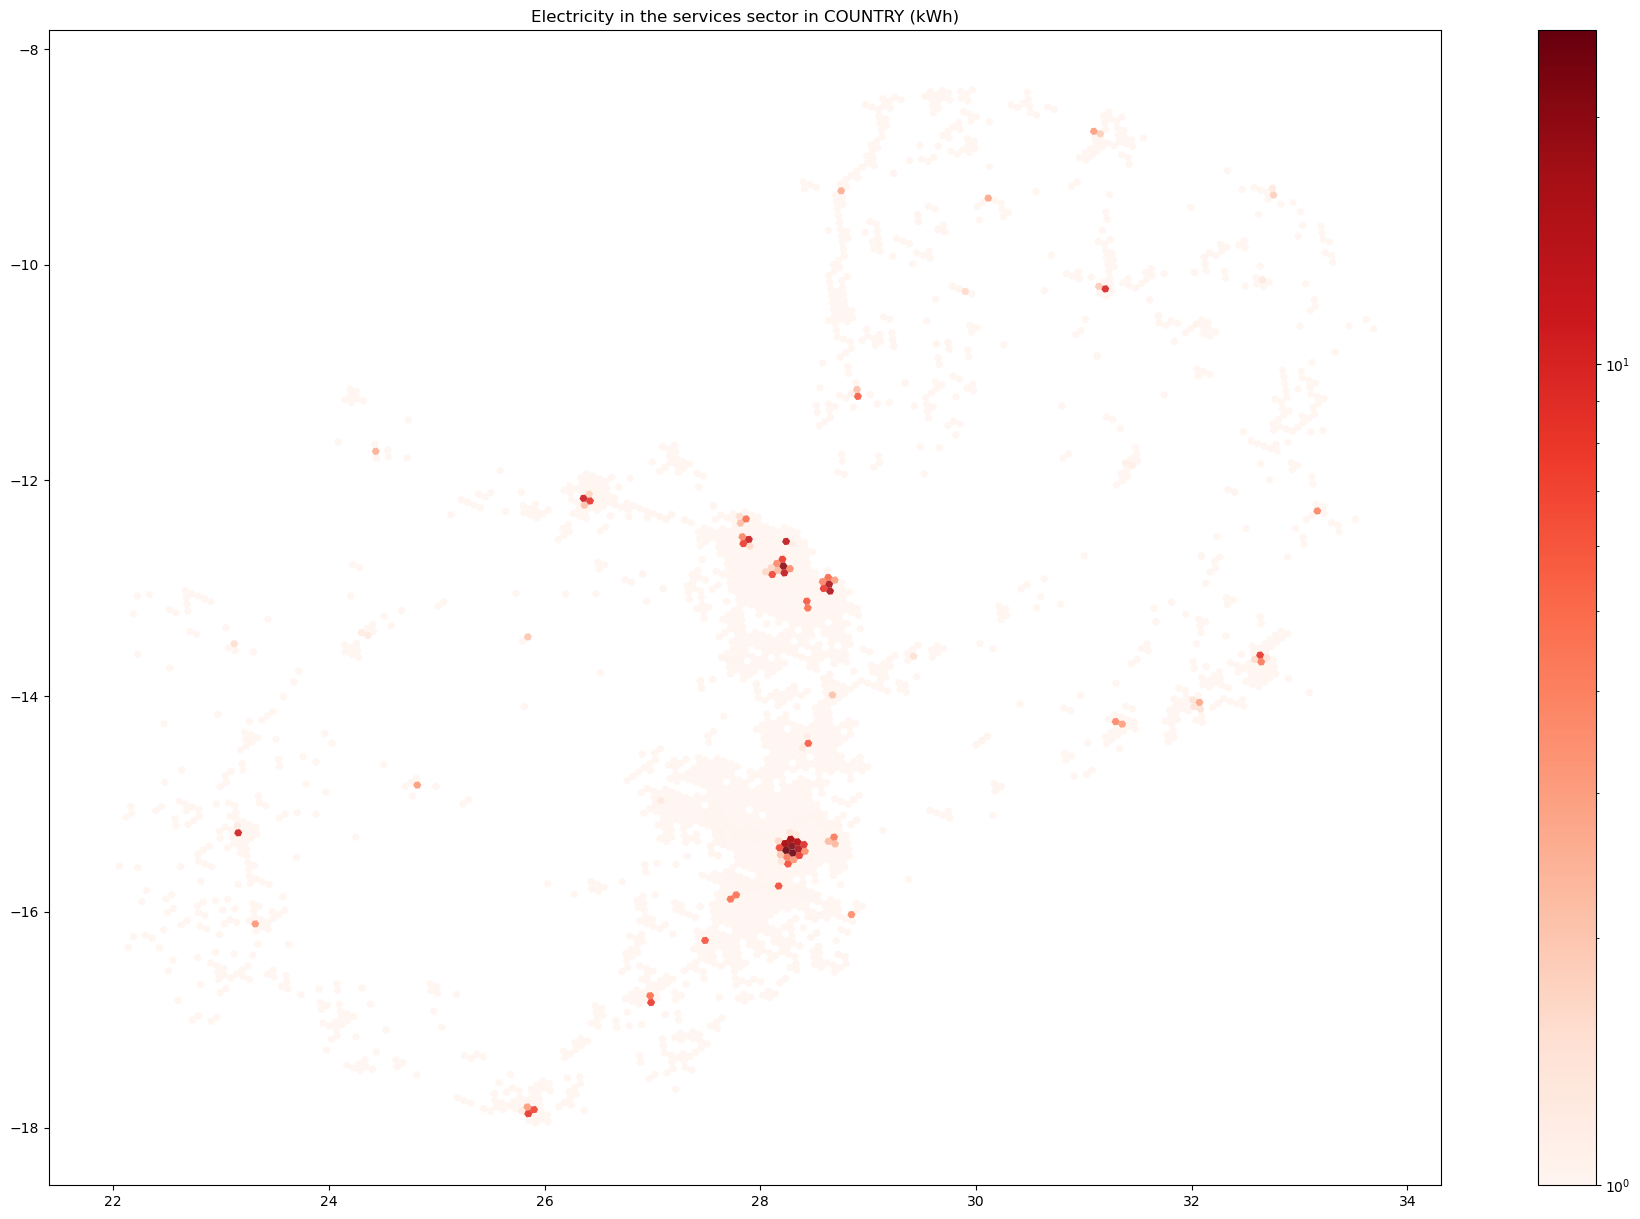

In [26]:
# Plot the demand map with a log scale value
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Plot data
grid.sort_values('SEn_GWh', ascending=True).plot(
    ax=ax, column='SEn_GWh', cmap="Reds", legend=True, alpha=0.9, norm=colors.LogNorm(vmin = 1, vmax=grid['SEn_GWh'].max()))

# # Plot data
# grid.sort_values('TotalDem', ascending=True).plot(
#     ax=ax, column='TotalDem', cmap="Reds", legend=True, alpha=0.5, vmin=0, vmax=threshold)

# # Plot data
# grid.sort_values('TotalDem', ascending=True).plot(
#     ax=ax, column='TotalDem', cmap="Reds", legend=True, alpha=0.9)

ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity in the services sector in {} (kWh)'.format(area) )

# Save plot as figure 
plt.savefig('sample_priority_map_log_ser.png', bbox_inches='tight')

### Industry map

In [27]:
## admininstrative boundary
admin_path = in_path + "\\"+ 'admin'
admin_name = "gadm41_ZMB.gpkg"      
region_col_name = "NAME_1"   ## Provide the name of the column you want to use to clip the hexagons e.g., "NAME" or "ADM1_NAME"
layer_region_name = "ADM_ADM_1"
layer_admin_name = "ADM_ADM_0"
if area == "COUNTRY":
    admin_gdf = gpd.read_file(admin_path + "/" + admin_name, layer=layer_admin_name)

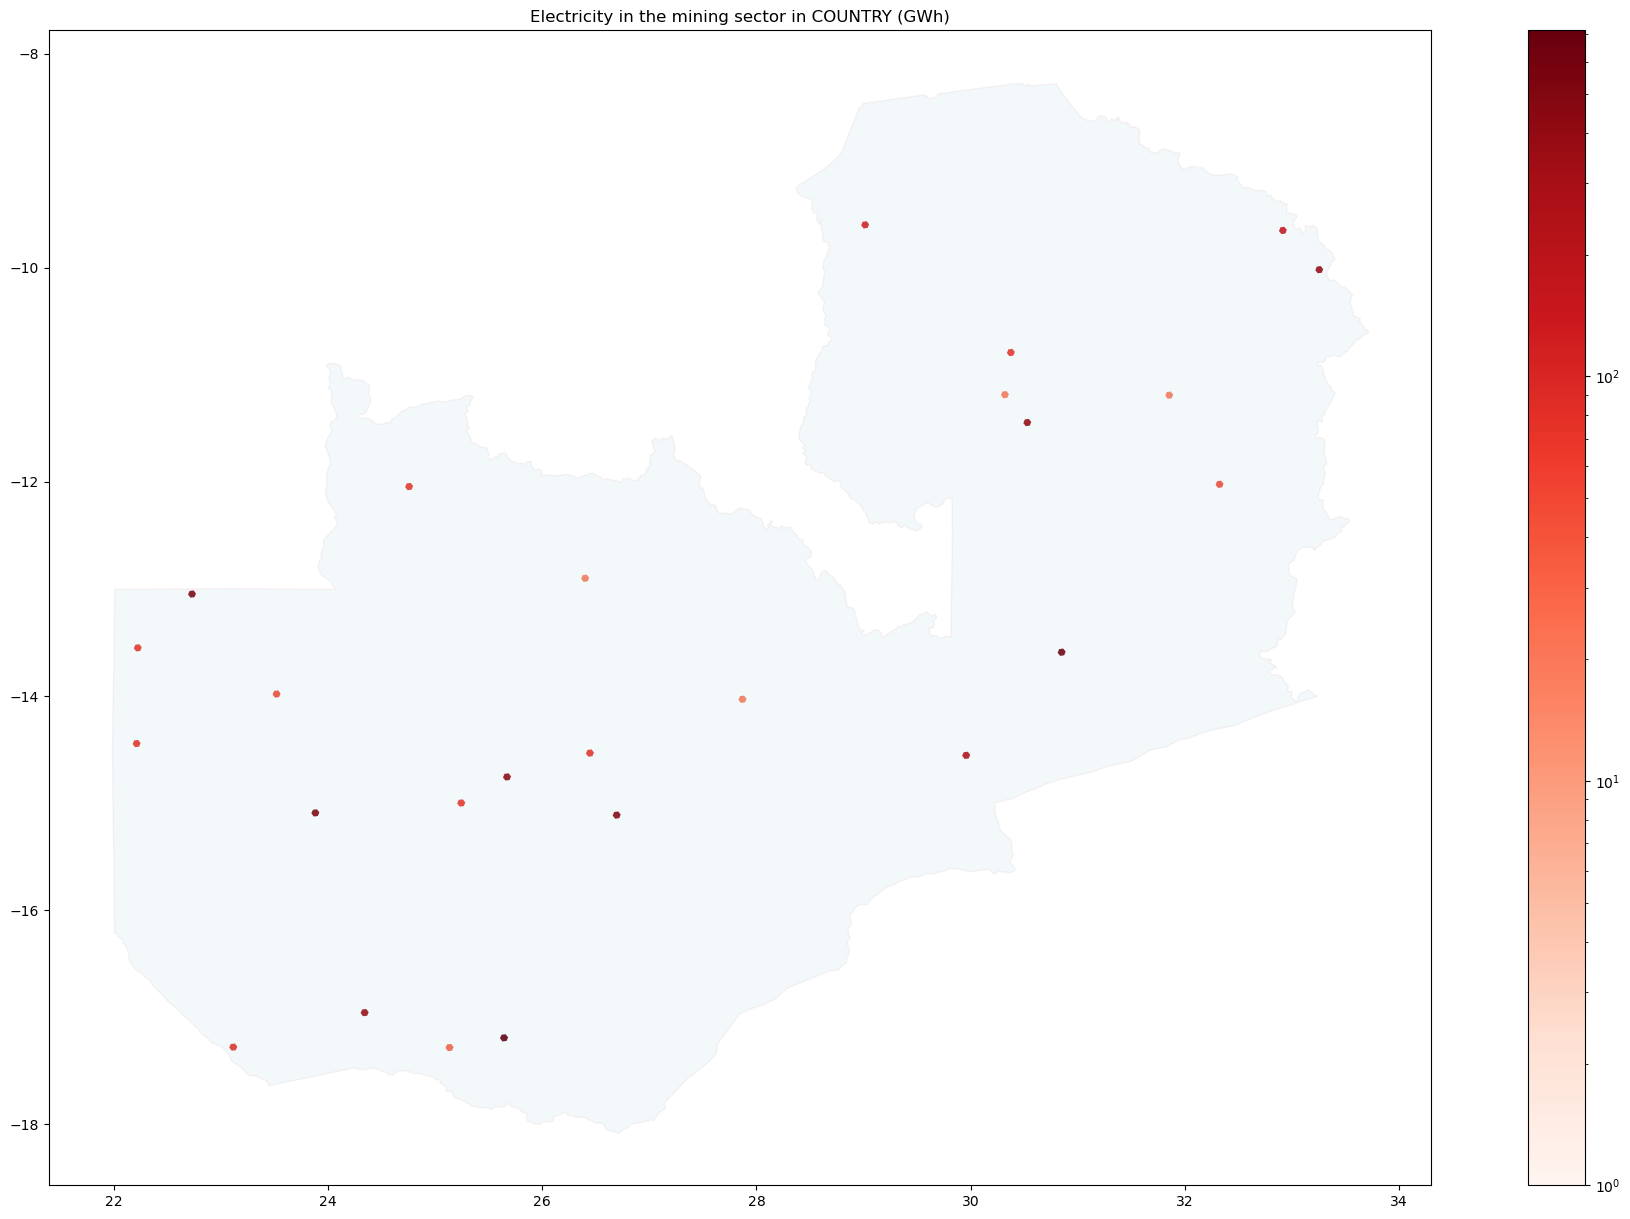

In [28]:
# Plot the industry demand map per cell
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Plot data with a log scale value
grid.sort_values('IndEnergy_GWh', ascending=True).plot(
    ax=ax, column='IndEnergy_GWh', cmap="Reds", legend=True, alpha=0.9, norm=colors.LogNorm(vmin = 1, vmax=grid['IndEnergy_GWh'].max()))

# # Plot data
# grid.sort_values('IndEnergy_GWh', ascending=True).plot(
#     ax=ax, column='IndEnergy_GWh', cmap="Reds", legend=True, alpha=0.5, vmin=0, vmax=threshold)

# # Plot data
# grid.sort_values('IndEnergy_GWh', ascending=True).plot(
#     ax=ax, column='IndEnergy_GWh', cmap="Reds", legend=True, alpha=0.9)

admin_gdf.plot(ax=ax, edgecolor='brown', alpha=0.05)
ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity in the mining sector in {} (GWh)'.format(area) )

# Save plot as figure 
plt.savefig('sample_priority_map_ind.png', bbox_inches='tight')

In [29]:
(grid['IndEnergy_GWh'] != 0).sum()

np.int64(18386)

In [30]:
(grid['IndEnergy_GWh'] > 50).sum()

np.int64(19)

In [31]:
totalperregion=grid.groupby('NAME_1')['IndEnergy_GWh'].sum()
totalperregion

NAME_1
Central         1,494.1511
Copperbelt          0.0000
Eastern           196.7317
Luapula           104.1389
Lusaka              0.0000
Muchinga          894.1581
North-Western     677.1303
Northern           84.4252
Southern          745.5263
Western         1,032.2429
Name: IndEnergy_GWh, dtype: float64

In [32]:
grid['totalindeperregion'] = grid['NAME_1'].map(totalperregion)

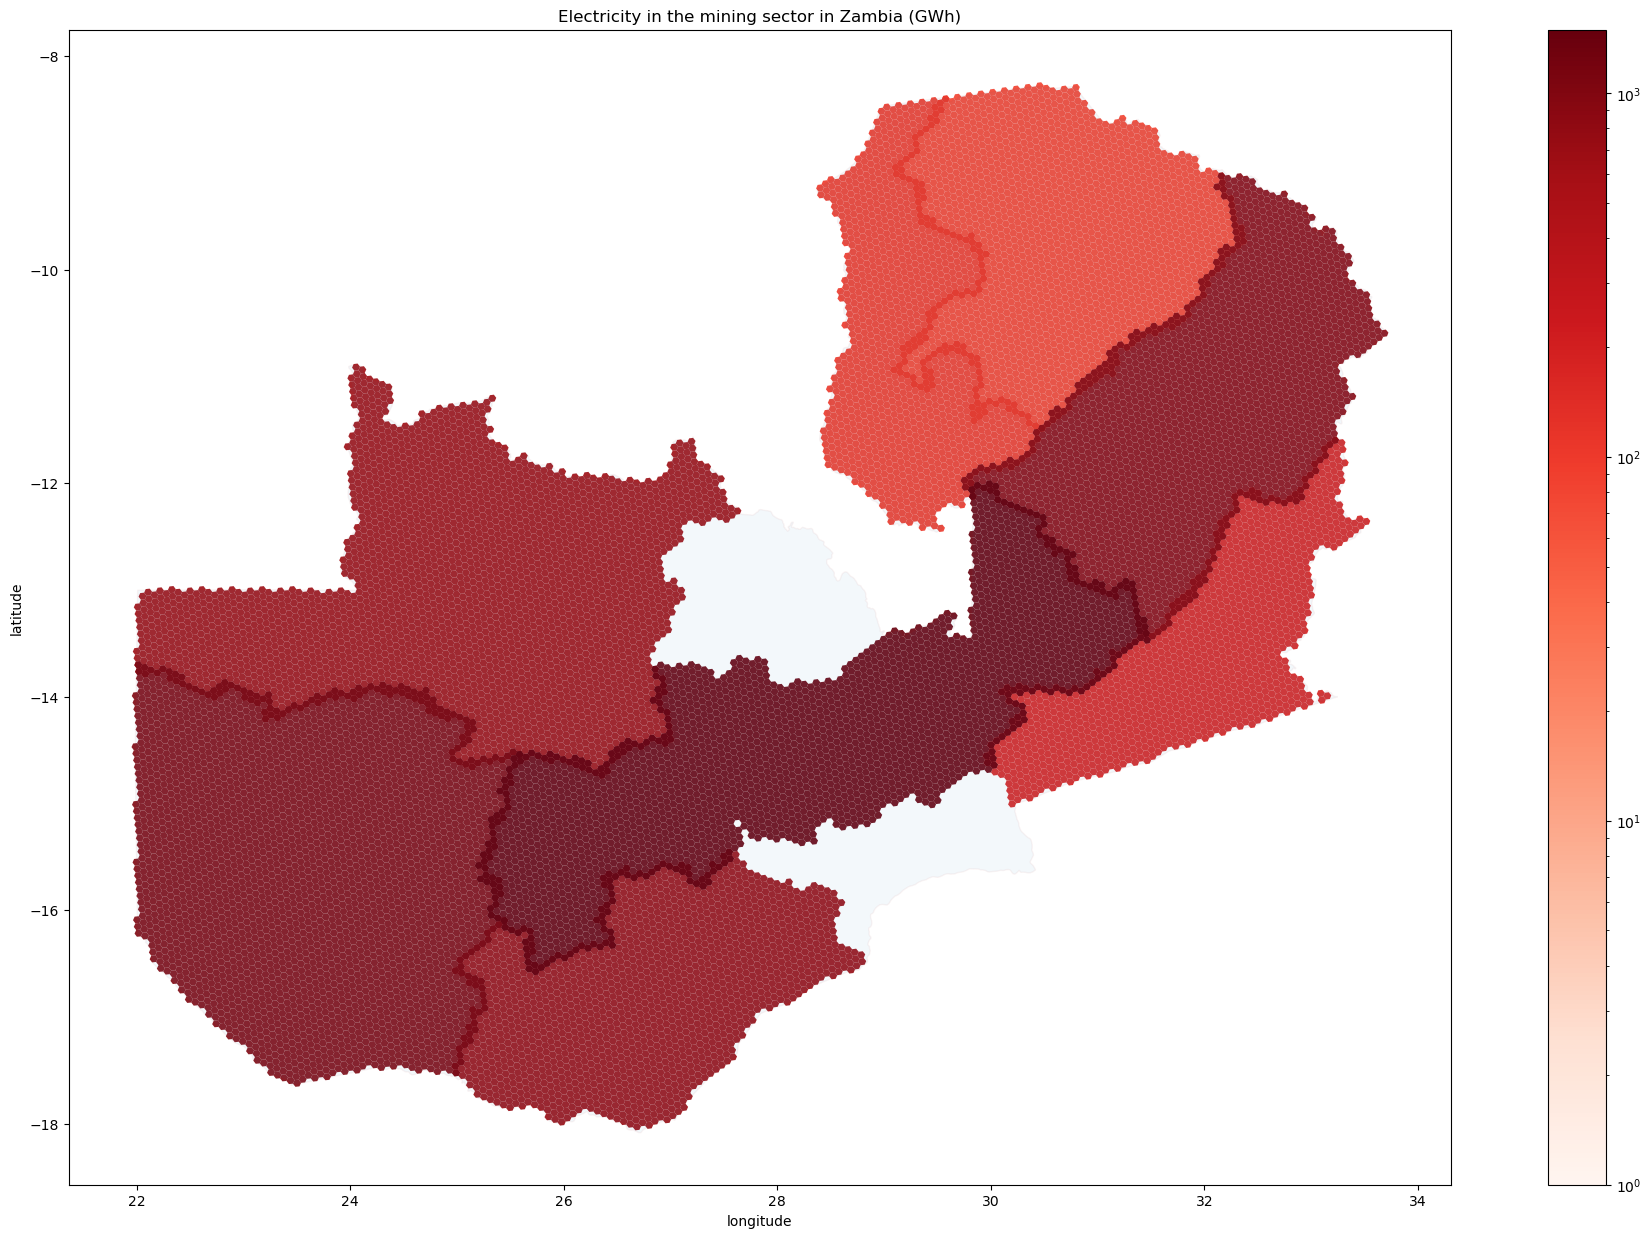

In [33]:
# Plot the demand map with a log scale value
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Plot data
grid.sort_values('totalindeperregion', ascending=True).plot(
    ax=ax, column='totalindeperregion', cmap="Reds", legend=True, alpha=0.9, norm=colors.LogNorm(vmin = 1, vmax=grid['totalindeperregion'].max()))

# # Plot data
# grid.sort_values('totalindeperregion', ascending=True).plot(
#     ax=ax, column='totalindeperregion', cmap="Reds", legend=True, alpha=0.5, vmin=0, vmax=threshold)

# # Plot data
# grid.sort_values('totalindeperregion', ascending=True).plot(
#     ax=ax, column='totalindeperregion', cmap="Reds", legend=True, alpha=0.9)
admin_gdf.plot(ax=ax, edgecolor='brown', alpha=0.05)
ax.set_aspect('equal', 'box')
ax.set_title('Electricity in the mining sector in Zambia (GWh)')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

from matplotlib.ticker import FuncFormatter

# fmt = lambda x, pos: '{:.1%}'.format(x)
# cbar = plt.colorbar(format=FuncFormatter(fmt))

# Save plot as figure 
plt.savefig('sample_priority_map_log_ind.png', bbox_inches='tight')